### Objective:
Practice the machine learning workflow to predict a car's market price using its attributes.

### About The Dataset
Download [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)
See Dataset information [here](https://archive.ics.uci.edu/ml/datasets/Automobile)

The data set contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

## Reading The Data
The dataset name is `"imports-85.data"`.
Although the dataset is of type `".data"`, on opening the dataset in a file editor, we can see it is of `csv` format.
We can read this csv type dataset into a dataframe.


In [44]:
import pandas as pd
cars = pd.read_csv("data/imports-85.data")
print(cars.head())

   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.60  ...    \
0  3    ?  alfa-romero  gas  std   two  convertible  rwd  front   88.6  ...     
1  1    ?  alfa-romero  gas  std   two    hatchback  rwd  front   94.5  ...     
2  2  164         audi  gas  std  four        sedan  fwd  front   99.8  ...     
3  2  164         audi  gas  std  four        sedan  4wd  front   99.4  ...     
4  2    ?         audi  gas  std   two        sedan  fwd  front   99.8  ...     

   130  mpfi  3.47  2.68  9.00  111  5000  21  27  13495  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
1  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
2  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
3  136  mpfi  3.19  3.40   8.0  115  5500  18  22  17450  
4  136  mpfi  3.19  3.40   8.5  110  5500  19  25  15250  

[5 rows x 26 columns]


###### Column Names
The column names are missing from the dataset.
We can get the column names from the Attributes section of the dataset source site [here](https://archive.ics.uci.edu/ml/datasets/Automobile)

There are 26 attributes/column names. Instead of manually copy-pasting each column name into the list, we can place the attribute data into an excel spreadsheet and use formulas to extract the column name and also add quotes and commas to each. Each column name begins after the first space and ends before a colon.

In [45]:
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
           'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 
           'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 
           'highway-mpg', 'price']

cars.columns = columns
print(cars.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   
4          2                 ?         audi       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1    hatchback          rwd           front        94.5  ...            152   
2        sedan          fwd           front        99.8  ...            109   
3        sedan          4wd           front        99.4  ...            136   
4        sedan          fwd           front        99.8  ...            136   

   fuel-system  bore  stroke compressi

## Exploring The Data
We can get details about the dataset
* number of rows
* number of columns
* column types
* summary information for the numeric columns


In [46]:
print(cars.info())
#print(cars.shape) 
#print(cars.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized-losses    204 non-null object
make                 204 non-null object
fuel-type            204 non-null object
aspiration           204 non-null object
num-of-doors         204 non-null object
body-style           204 non-null object
drive-wheels         204 non-null object
engine-location      204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
engine-type          204 non-null object
num-of-cylinders     204 non-null object
engine-size          204 non-null int64
fuel-system          204 non-null object
bore                 204 non-null object
stroke               204 non-null object
compression-ratio    204 non-null float64
horsepower           204 non-nul

In [47]:
print(cars.describe())

        symboling  wheel-base      length       width      height  \
count  204.000000  204.000000  204.000000  204.000000  204.000000   
mean     0.823529   98.806373  174.075000   65.916667   53.749020   
std      1.239035    5.994144   12.362123    2.146716    2.424901   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.075000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.200000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   204.000000   204.000000         204.000000  204.000000   204.000000  
mean   2555.602941   126.892157          10.148137   25.240196    30.769608  
std     521.960820    41.744569           3.981000    6.551513     6.898337  
min    1488.000000    61.000000           7.000000   13.000000    

---
#### Observations

1.**Numeric columns**  
  There are 10 numeric columns (5 integer and 5 float) which can be used as **features**.
  * `symboling`            204 non-null int64     values -3, -2, -1, 0, 1, 2, 3 per documentation
  * `wheel-base`           204 non-null float64   values continuous from 86.6 120.9
  * `length`               204 non-null float64   values continuous from 141.1 to 208.1
  * `width`                204 non-null float64   values continuous from 60.3 to 72.3
  * `height`               204 non-null float64   values continuous from 47.8 to 59.8
  * `curb-weight`          204 non-null int64     values continuous from 1488 to 4066
  * `engine-size`          204 non-null int64     values continuous from 61 to 326
  * `compression-ratio`    204 non-null float64   values continuous from 7 to 23
  * `city-mpg`             204 non-null int64     values continuous from 13 to 49
  * `highway-mpg`          204 non-null int64     values continuous from 16 to 54  


2.**Target column**  
  The **target** column is the `price` column. This is currently a string and will have to be converted to float.
  * `price`                204 non-null object  


3.**Numeric data in string columns**
  The following columns are of string type but have numeric data in them. These can be considered for conversion to float and     used as features.
  * `normalized-losses`    204 non-null object # continuous numeric values from 65 to 256 per documentation
  * `bore`                 204 non-null object # values - continuous from 2.54 to 3.94
  * `stroke`               204 non-null object # values - continuous from 2.07 to 4.17
  * `horsepower`           204 non-null object # values - continuous from 48 to 288
  * `peak-rpm`             204 non-null object # values - continuous from 4150 to 6600  


4.**Numeric data spelled out in string columns**
  The following columns are of string type but have numeric data spelled out. These can be considered for conversion to float     and used as features.
  * `num-of-doors`         204 non-null object # values - four, two; can be considered for usage as feature
  * `body-style`           204 non-null object # values - four, two; can be considered for usage as feature
  * `num-of-cylinders`     204 non-null object # values - eight, five, four, six, three, twelve, two  


5.**string columns containing set of values**
  The following columns are of string type but have values that can be converted to numeric data using codes. Can these be         considered for conversion to float and used as features?
  * `fuel-type`            204 non-null object # values - diesel, gas; can be considered for usage as feature
  * `aspiration`           204 non-null object # values - std, turbo; can be considered for usage as feature
  * `drive-wheels`         204 non-null object # values - 4wd, fwd, rwd
  * `engine-location`      204 non-null object # values - front, rear
  * `engine-type`          204 non-null object # values - dohc, dohcv, l, ohc, ohcf, ohcv, rotor
  * `fuel-system`          204 non-null object # values - 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi  


6.**string column with string data**
  * `make`                 204 non-null object # values - audi, bmw, etc

## Cleaning The Data
Before trying to convert the string columns to float, we need to find the number of missing values ('?') in those columns.

#### Options:
1. Replace the missing values using the values from similar cars.
2. Drop the rows entirely (especially if other columns in those rows have missing values).
3. Drop the column entirely.

In [79]:
numeric_cols = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]
for column in numeric_cols:
    print(column, " ", cars[column].value_counts()['?'])

KeyError: '?'

#### Notes
**The values are hard-coded as '?' and are not actually missing values NaN. So dropna does not work. 
The rows will have to be removed through another method. **

#### Filtering out all the rows with missing value i.e. "?"

In [66]:
for column in numeric_cols:
    filter_missing_values = cars[column] != "?"
    cars = cars[filter_missing_values]
    #print(cars[column].value_counts())


In [67]:
print(cars.info())
print(cars.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 2 to 203
Data columns (total 26 columns):
symboling            160 non-null int64
normalized-losses    160 non-null object
make                 160 non-null object
fuel-type            160 non-null object
aspiration           160 non-null object
num-of-doors         160 non-null object
body-style           160 non-null object
drive-wheels         160 non-null object
engine-location      160 non-null object
wheel-base           160 non-null float64
length               160 non-null float64
width                160 non-null float64
height               160 non-null float64
curb-weight          160 non-null int64
engine-type          160 non-null object
num-of-cylinders     160 non-null object
engine-size          160 non-null int64
fuel-system          160 non-null object
bore                 160 non-null object
stroke               160 non-null object
compression-ratio    160 non-null float64
horsepower           160 non-nul

#### Convert the object type columns with numeric data to float type.

In [71]:
for column in numeric_cols:
    cars[column] = cars[column].astype('float64') 
    #cars["normalized-losses"] = cars["normalized-losses"].astype('float64') 

print(cars.info())
print(cars.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 2 to 203
Data columns (total 26 columns):
symboling            160 non-null int64
normalized-losses    160 non-null float64
make                 160 non-null object
fuel-type            160 non-null object
aspiration           160 non-null object
num-of-doors         160 non-null object
body-style           160 non-null object
drive-wheels         160 non-null object
engine-location      160 non-null object
wheel-base           160 non-null float64
length               160 non-null float64
width                160 non-null float64
height               160 non-null float64
curb-weight          160 non-null int64
engine-type          160 non-null object
num-of-cylinders     160 non-null object
engine-size          160 non-null int64
fuel-system          160 non-null object
bore                 160 non-null float64
stroke               160 non-null float64
compression-ratio    160 non-null float64
horsepower           160 non-

In [69]:
#print(cars["normalized-losses"].value_counts())
#print()
#cars["normalized-losses"].isnull().sum()
#print(cars.isnull().values.ravel().sum())
#print(cars.shape[0] - cars.dropna().shape[0])
#print(cars["normalized-losses"].isnull().sum())
#print()
#print(cars.isnull().sum())

Convert all string columns with numeric data in them to float type.

In [70]:
#numeric_cols = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]
#cars[numeric_cols] = cars[numeric_cols].apply(pd.to_numeric)
#print(cars.info())
#print(cars.describe())

## Normalizing the numeric columns

#### Convert the target 'price' column from string to float
#### Create a datafrane with only the numeric columns
#### Normalize

In [80]:
cars["price"] = cars["price"].astype('float64') 

In [81]:
import numpy as np
#cars_num = cars.select_dtypes(include=[np.float, np.int])
cars_num = cars.select_dtypes(include=['float64', 'int64'])
#cars_num = cars_num.select_dtypes(include=[np.float])
cars_num.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 2 to 203
Data columns (total 16 columns):
symboling            160 non-null int64
normalized-losses    160 non-null float64
wheel-base           160 non-null float64
length               160 non-null float64
width                160 non-null float64
height               160 non-null float64
curb-weight          160 non-null int64
engine-size          160 non-null int64
bore                 160 non-null float64
stroke               160 non-null float64
compression-ratio    160 non-null float64
horsepower           160 non-null float64
peak-rpm             160 non-null float64
city-mpg             160 non-null int64
highway-mpg          160 non-null int64
price                160 non-null float64
dtypes: float64(11), int64(5)
memory usage: 21.2 KB


In [82]:
#cars_normalized = (cars_num - cars_num.mean()) / cars_num.std()
#print(cars_normalized.head())

cars_normalized = (cars_num - cars_num.min()) / (cars_num.max() - cars_num.min())
print(cars_normalized.head())


   symboling  normalized-losses  wheel-base    length     width    height  \
2        0.8           0.518325    0.455172  0.577236  0.517544  0.471154   
3        0.8           0.518325    0.441379  0.577236  0.535088  0.471154   
5        0.6           0.486911    0.662069  0.839024  0.973684  0.605769   
7        0.6           0.486911    0.662069  0.839024  0.973684  0.625000   
9        0.8           0.664921    0.503448  0.580488  0.394737  0.471154   

   curb-weight  engine-size      bore    stroke  compression-ratio  \
2     0.329325     0.243655  0.464286  0.633333            0.18750   
3     0.518231     0.380711  0.464286  0.633333            0.06250   
5     0.525989     0.380711  0.464286  0.633333            0.09375   
7     0.619860     0.355330  0.421429  0.633333            0.08125   
9     0.351823     0.238579  0.685714  0.347619            0.11250   

   horsepower  peak-rpm  city-mpg  highway-mpg     price  
2    0.355263  0.551020  0.264706     0.333333  0.295010 

## Create A Univariate Model

#### Function to train and test a univariate model using default k value

In [97]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

rmse_dict = {}

def knn_train_test(col, df, k):
    #error check for non-numeric column
    #error check for column not in df
        
    #randomize
    np.random.seed(1)
    shuffled_idx = np.random.permutation(df.index)
    df = df.loc[shuffled_idx]
    
    #split dataset into training and test set
    rec_count = len(df)
    train_df_count = int(round(0.75 * len(df))) - 1
    train_df = df.iloc[0: train_df_count]
    test_df = df.iloc[train_df_count: ]
    
    #instantiate a KNeighborsRegressor class
    knn = KNeighborsRegressor()
    
    #fit model
    knn.fit(train_df[[col]], train_df["price"])
    
    #predict
    predictions = knn.predict(test_df[[col]])
    
    #calculate RMSE
    mse = mean_squared_error(test_df["price"], predictions)
    rmse = mse ** (0.5)
    #print(col, " :", rmse)
    rmse_dict[col] = rmse
    
    #plot histogram
    #plt.histogram()

k_values = [1, 3, 5, 7, 9]
#call function with different columns
feature_cols = cars_num.columns.tolist()
for column in feature_cols:
    knn_train_test(column, cars_normalized, k_values)

#print(rmse_dict)
rmse_sorted_keys = sorted(rmse_dict, key=rmse_dict.get, reverse=False)
#print(rmse_sorted_keys)
for col in rmse_sorted_keys:
    print (col, rmse_dict[col])
    


price 0.03159849872
curb-weight 0.0885648512463
width 0.0904124395859
engine-size 0.0933353104075
highway-mpg 0.106177518389
city-mpg 0.107633127579
horsepower 0.127036716454
length 0.147067051215
wheel-base 0.166073717576
bore 0.166107254774
normalized-losses 0.172077742256
stroke 0.185961644222
height 0.19263158252
peak-rpm 0.2018593477
symboling 0.206988458084
compression-ratio 0.232757107484


#### Observations
Based on RMSE value for the univariate models, the following are the top 3 columns with best performance:
1. curb-weight
2. width
3. engine-size


#### Function to train and test a univariate model using various k values

city-mpg 0.0924830746574
engine-size 0.0955533987895
width 0.115381184067
curb-weight 0.118352478146
highway-mpg 0.120222524267
length 0.131143191591
horsepower 0.14297513126
normalized-losses 0.159388180556
stroke 0.17437779986
wheel-base 0.19023319109
bore 0.203122459325
symboling 0.221964983057
peak-rpm 0.226181933398
compression-ratio 0.270119364443
height 0.291782750686


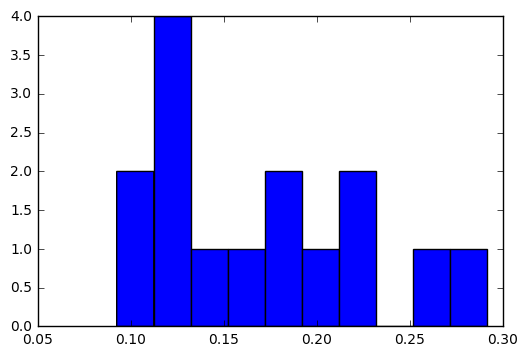

width 0.0849120292984
engine-size 0.0911820946266
curb-weight 0.0975065608653
highway-mpg 0.10434997354
city-mpg 0.110893843798
horsepower 0.125894066583
length 0.135671233994
normalized-losses 0.142416558007
bore 0.170453380544
stroke 0.176298725406
wheel-base 0.180383461841
height 0.209946275281
peak-rpm 0.215891615547
symboling 0.225486238987
compression-ratio 0.244787942121


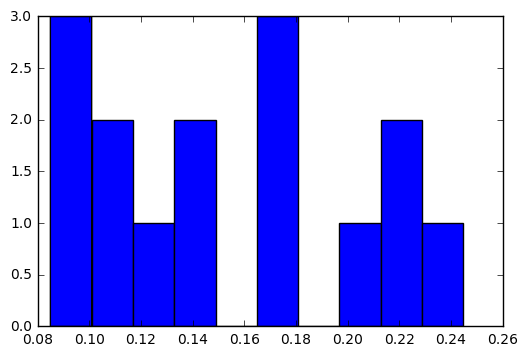

curb-weight 0.0885648512463
width 0.0904124395859
engine-size 0.0933353104075
highway-mpg 0.106177518389
city-mpg 0.107633127579
horsepower 0.127036716454
length 0.147067051215
wheel-base 0.166073717576
bore 0.166107254774
normalized-losses 0.172077742256
stroke 0.185961644222
height 0.19263158252
peak-rpm 0.2018593477
symboling 0.206988458084
compression-ratio 0.232757107484


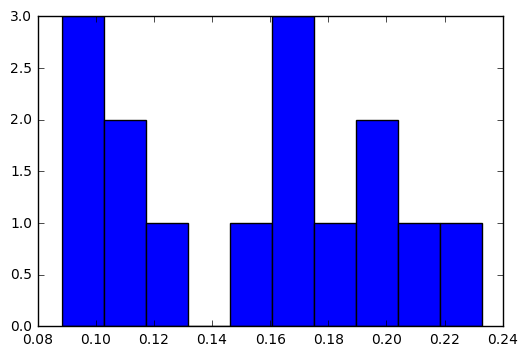

width 0.0957158569976
curb-weight 0.0991456829844
city-mpg 0.106278637901
highway-mpg 0.11483404315
engine-size 0.115812624433
horsepower 0.119127308349
length 0.143509489494
bore 0.160280222552
wheel-base 0.160345146728
stroke 0.183327421722
normalized-losses 0.187848783494
height 0.191896055478
symboling 0.196338205794
peak-rpm 0.209988477886
compression-ratio 0.22731510401


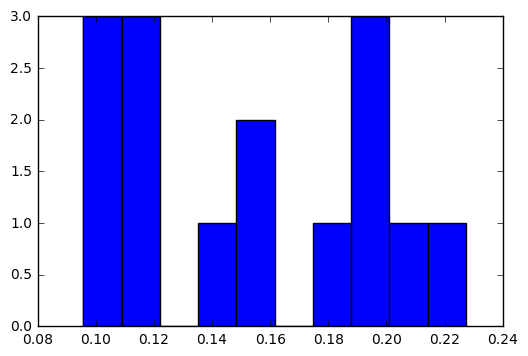

width 0.101025192534
curb-weight 0.101137301245
city-mpg 0.107530866812
highway-mpg 0.117067426017
horsepower 0.120194758662
engine-size 0.124367396406
length 0.141111347701
bore 0.159153843017
wheel-base 0.160618492659
stroke 0.187288335516
normalized-losses 0.198911961891
height 0.199029970046
symboling 0.205352529442
peak-rpm 0.219227556749
compression-ratio 0.221927281917


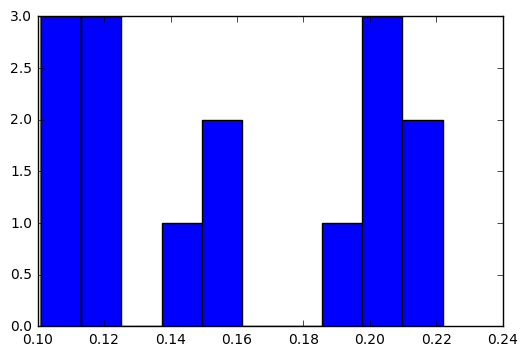

In [105]:
rmse_k_dict = {}

# Train test function
def knn_train_test_k(feature_cols, df, k_values):
    #error check for non-numeric column
    #error check for column not in df
        
    #randomize
    np.random.seed(1)
    shuffled_idx = np.random.permutation(df.index)
    df = df.loc[shuffled_idx]
    
    #split dataset into training and test set
    rec_count = len(df)
    train_df_count = int(round(0.75 * len(df))) - 1
    train_df = df.iloc[0: train_df_count]
    test_df = df.iloc[train_df_count: ]
    
    rmse_list = []
    
    #instantiate a KNeighborsRegressor class
    
    for k in k_values:
        rmse_list = []
        rmse_k_dict = {}
        for col in feature_cols:
            knn = KNeighborsRegressor(k)
            #fit model
            knn.fit(train_df[[col]], train_df["price"])
            #predict
            predictions = knn.predict(test_df[[col]])
            #calculate RMSE
            mse = mean_squared_error(test_df["price"], predictions)
            rmse = mse ** (0.5)
            rmse_list.append(rmse)
            #print(col, " :", k, " :", rmse)
            rmse_k_dict[col] = rmse
        rmse_k_sorted_keys = sorted(rmse_k_dict, key=rmse_k_dict.get, reverse=False)
        for col in rmse_k_sorted_keys:
            print (col, rmse_k_dict[col])
        plt.hist(rmse_list)
        plt.show()
        
    #rmse_dict[col] = rmse
    
    #plot histogram
    #plt.histogram()

k_values = [1, 3, 5, 7, 9]
#call function with different columns

feature_cols = cars_num.columns.tolist()
feature_cols.remove("price")
#for column in feature_cols:
#    knn_train_test_k(column, cars_normalized, k_values)
knn_train_test_k(feature_cols, cars_normalized, k_values)
    
#for k in k_values:
#    plt.hist(k_values, rmse_list)
#    plt.show
    


#### Observations
1. k=1 -->
  1. city-mpg 0.0924830746574
  1. engine-size 0.0955533987895
  1. width 0.115381184067
  1. curb-weight 0.118352478146
  1. highway-mpg 0.120222524267
2. k=2
  1. width 0.0849120292984
  1. engine-size 0.0911820946266
  1. curb-weight 0.0975065608653
  1. highway-mpg 0.10434997354
  1. city-mpg 0.110893843798
3. k=3
  1. curb-weight 0.0885648512463
  1. width 0.0904124395859
  1. engine-size 0.0933353104075
  1. highway-mpg 0.106177518389
  1. city-mpg 0.107633127579
4. k=4
  1. width 0.0957158569976
  1. curb-weight 0.0991456829844
  1. city-mpg 0.106278637901
  1. highway-mpg 0.11483404315
  1. engine-size 0.115812624433
5. k=5
  1. width 0.101025192534
  1. curb-weight 0.101137301245
  1. city-mpg 0.107530866812
  1. highway-mpg 0.117067426017
  1. horsepower 0.120194758662


## Create A Multivariate Model

#### Function to train and test a univariate model using default k value

In [ ]:


# Train test function
def knn_train_test_multi(feature_cols, df, k_values):
    #error check for non-numeric column
    #error check for column not in df
        
    #randomize
    np.random.seed(1)
    shuffled_idx = np.random.permutation(df.index)
    df = df.loc[shuffled_idx]
    
    #split dataset into training and test set
    rec_count = len(df)
    train_df_count = int(round(0.75 * len(df))) - 1
    train_df = df.iloc[0: train_df_count]
    test_df = df.iloc[train_df_count: ]
    
    rmse_list = []
    
    #instantiate a KNeighborsRegressor class
    
    for k in k_values:
        rmse_list = []
        for col in feature_cols:
            knn = KNeighborsRegressor(k)
            #fit model
            knn.fit(train_df[[col]], train_df["price"])
            #predict
            predictions = knn.predict(test_df[[col]])
            #calculate RMSE
            mse = mean_squared_error(test_df["price"], predictions)
            rmse = mse ** (0.5)
            rmse_list.append(rmse)
            print(col, " :", k, " :", rmse)
        plt.hist(rmse_list)
        plt.show()
        
    #rmse_dict[col] = rmse
    
    #plot histogram
    #plt.histogram()

k_values = [1, 3, 5, 7, 9]
#call function with different columns

feature_cols = cars_num.columns.tolist()
#for column in feature_cols:
#    knn_train_test_k(column, cars_normalized, k_values)
knn_train_test_k(feature_cols, cars_normalized, k_values)
    
#for k in k_values:
#    plt.hist(k_values, rmse_list)
#    plt.show
    
